# check

In [ ]:
print("Hello")

Hello


# importing relevant libraries and taking uploaded data from github

In [1]:
import numpy as np
from tensorflow.keras import losses as lo_ss
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
import os
github_raw_link="https://raw.githubusercontent.com/Aryansh085/LAP/main/858417d1-7d54-4115-a01b-fdda5e03ada3_testing_combined_rows4035_disc_1_0p9_MULTIPLY_preproces_155cols.csv"
df=pd.read_csv((github_raw_link),header = None)

df

# df = pd.read_csv('/content/858417d1-7d54-4115-a01b-fdda5e03ada3_testing_combined_rows4035_disc_1_0p9_MULTIPLY_preproces_155cols.csv')
# print(df)

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,2,0.000027,-18.8,1.0,-51.2,5928.833355,796.358239,-2237.601612,-4291.285903,485.614457,...,-184.665696,-143.541755,-356.073963,-155.953441,-571.260816,548.824942,-147.125237,-15.699306,-114.852994,-125.048631
1,0,0.000030,-18.8,1.0,-51.2,-861.308727,2307.828939,1422.328418,-2551.334533,-561.570173,...,270.453742,-52.096877,195.996829,-103.884779,111.627671,19.870049,209.325186,13.936288,261.752370,15.264500
2,0,0.000034,-18.7,1.0,-50.6,-1851.188870,-1823.489706,-1483.762355,956.114350,-2017.286057,...,193.869011,94.069003,-126.387084,145.724626,131.659001,-84.659240,90.034459,-63.858855,-79.851765,-36.496837
3,0,0.000038,-18.5,1.0,-50.0,3826.693181,3614.186279,-1810.579042,-228.922261,-270.595184,...,-174.377444,-143.659035,-24.409795,3.847896,-80.058108,-12.424300,-2.449475,-82.492338,33.375895,10.991025
4,0,0.000042,-18.4,1.0,-49.4,-2345.665781,-1009.244748,-2798.268228,87.699940,326.821614,...,64.504130,-210.224006,-65.296202,40.269294,24.559670,-71.945851,103.014317,-113.017795,145.268924,-112.158828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,2,0.000000,82.9,31.8,-61.4,-1245.734872,-1615.032049,-1784.158416,361.415756,156.039717,...,-3.633283,-99.510990,52.122663,-141.796568,168.401590,-145.657905,78.278022,38.090024,-214.492314,145.345199
4031,2,0.000000,82.7,31.8,-61.4,1743.167881,-219.969994,353.010067,413.369952,-1057.733851,...,-371.606440,-161.391936,90.013115,56.553212,17.573522,136.672030,145.804752,-203.689696,-118.373036,52.921203
4032,0,0.000000,82.5,31.8,-61.3,7523.643927,-1346.518049,-437.245974,-3184.785512,697.115396,...,-87.525202,-60.850698,211.654447,-121.017454,443.020185,-395.819706,-85.330893,-357.307181,-178.380422,75.121322
4033,2,0.000000,82.5,31.8,-61.4,-1639.431817,3837.660828,-218.350574,2473.661181,0.514134,...,79.065958,-12.731323,-97.202328,-74.081315,-277.071732,50.313883,-6.449069,-194.796294,-248.021765,-117.951381


# Data preprocessing

In [ ]:
print(list(df))

cols = []
cols.append(0);

for i in range(5, 155):
  cols.append(i)

# cols = list(df)[5:]
# for i in range(0,1):
#   cols.append(df[df.columns[i]].to_list())
# for i in range(5,155):
#   cols.append(df[df.columns[i]].to_list())

#2-5 columns are not used in training. 
print(cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]
[0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,

In [ ]:
df_for_training = df[cols].astype(float)

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

# LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 1+150. We will make timesteps = 1 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []


In [ ]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (4030, 151)
#4030 refers to the number of data points and 151 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 1:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    # trainY.append(df_for_training_scaled[i - n_past:i, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (4030, 5, 150).
trainY shape == (4030, 1).


# Model making starts here 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             55040     
                                                                 
 lstm_1 (LSTM)               (None, 5, 32)             12416     
                                                                 
 lstm_2 (LSTM)               (None, 150)               109800    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 177,407
Trainable params: 177,407
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3627/3627 [============================

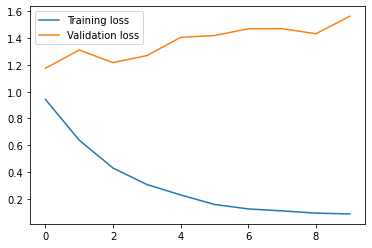

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(150, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False))

model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])
# model.compile(optimizer='adam',loss = lo_ss.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()


# fit the model
history=model.fit(trainX, trainY, epochs=10, batch_size=1,validation_split=0.1, verbose=1)

# plt.scatter(trainY,history)
print(history)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [ ]:
# model.model.evaluate(X_test_flat,Y_test)
model.evaluate(trainX, trainY)


126/126 [==============================] - 2s 7ms/step - loss: 0.2021 - accuracy: 0.0000e+00


[0.20208536088466644, 0.0]

# Same model just changing the activation function and parameters

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(150, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False))

# model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])
model.summary()


# fit the model
model.fit(trainX, trainY, epochs=10, batch_size=1, validation_split=0.1, verbose=1)



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 5, 100)            100400    
                                                                 
 lstm_22 (LSTM)              (None, 5, 50)             30200     
                                                                 
 lstm_23 (LSTM)              (None, 150)               120600    
                                                                 
 dense_7 (Dense)             (None, 1)                 151       
                                                                 
Total params: 251,351
Trainable params: 251,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3627/3627 [==============================] - 35s 9ms/step - loss: 1.0043 - accuracy: 0.0000e+00 - val_loss: 1.0019 - val_accuracy: 0.0000e+00
Epoch 2/10
3627/3627 [=====

In [ ]:
model.evaluate(trainX, trainY)


In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(150, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False))

# model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])
model.summary()


# fit the model
model.fit(trainX, trainY, epochs=15, batch_size=1, validation_split=0.1, verbose=1)



In [ ]:
model.evaluate(trainX, trainY)


In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(150, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False))

# model.add(Dropout(0.2))

model.add(Dense(100))

model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])
model.summary()


# fit the model
history=model.fit(trainX, trainY, epochs=5, batch_size=1, validation_split=0.1, verbose=1)



# plt.scatter(trainY,history)
print(history)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()



In [ ]:
model.evaluate(trainX, trainY)


In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(150, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(100,activation='sigmoid'))

model.add(Dense(trainY.shape[1],activation='sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])
model.summary()


# fit the model
history=model.fit(trainX, trainY, epochs=5, batch_size=1, validation_split=0.1, verbose=1)



# plt.scatter(trainY,history)
print(history)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()



In [ ]:
model.evaluate(trainX, trainY)
